In [7]:
## Classify different images of cloths and using tensorflow fashion mnist dataset 

import pandas as pd 
import numpy as np
import keras 
import matplotlib.pyplot as plt
import keras.datasets.fashion_mnist as fashion_mnist
import tensorflow as tf

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
train_images[0].shape, train_labels.shape

((28, 28), (60000,))

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [46]:
y_train = tf.one_hot(train_labels, depth=10)
y_test = tf.one_hot(test_labels, depth=10)

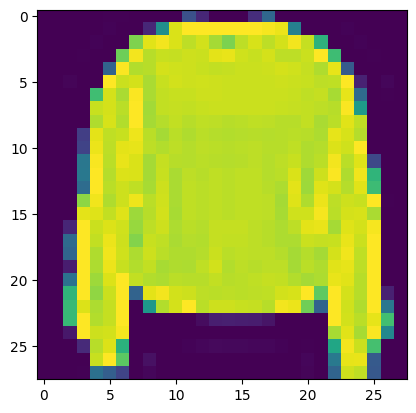

In [14]:
# Plot a single sample 

plt.imshow(train_images[7])

In [16]:
# Create a small list so that we can index onto our training labels so they are human readable 
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boat"]

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boat']

In [17]:
len(class_names)

10

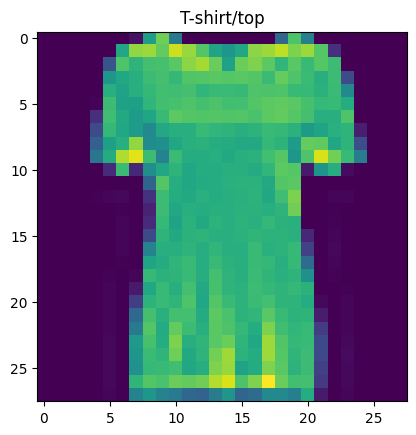

In [23]:
#plot and example image and label

def plot_image_with_class_name(X_train=train_images, y_train=train_labels, class_names=class_names, index=0):
    plt.imshow(X_train[index])
    plt.title(class_names[y_train[index]]) 

plot_image_with_class_name(index=10)

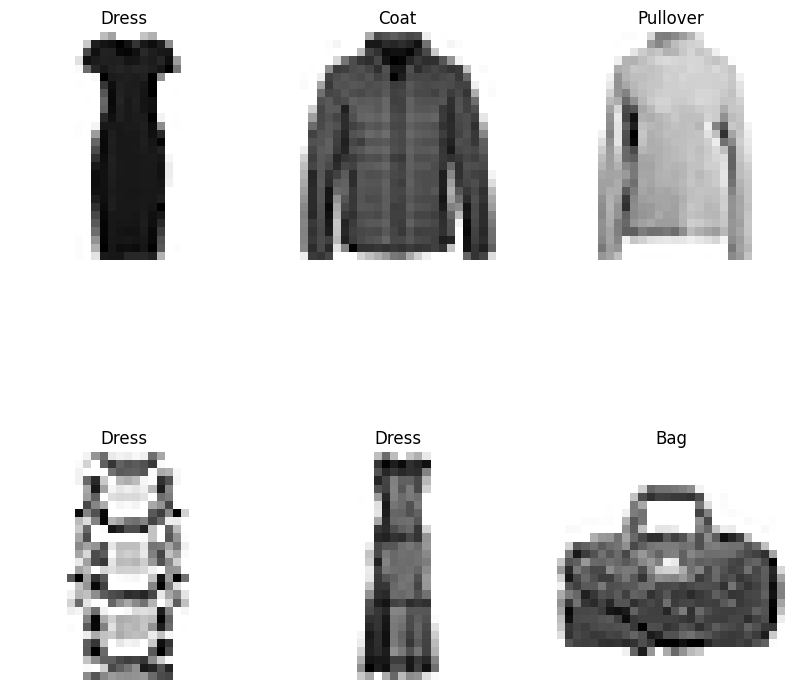

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import random 

def plot_n_number_of_images(images=train_images,
                            labels=train_labels,
                            label_names=class_names,
                            num_sample=15, 
                           num_col=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_sample):
        ax = plt.subplot(int(np.ceil(num_sample / num_col)), num_col, i+1) 
        rand_index = random.choice(range(len(images))) 
        plt.imshow(images[rand_index], cmap=plt.cm.binary)
        plt.title(label_names[train_labels[rand_index]])
        plt.axis(False)

plot_n_number_of_images(num_sample=6, num_col=3)

In [55]:
keras.utils.set_random_seed(42)

model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_1.compile(
    loss=keras.losses.CategoricalCrossentropy(),   # y_train must be one-hot
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_1.summary()
model_1.fit(train_images, y_train, epochs=100, verbose=1, batch_size=512, validation_data=(test_images, y_test))


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4153 - loss: 20.7706 - val_accuracy: 0.6147 - val_loss: 1.2619
Epoch 2/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6239 - loss: 1.1882 - val_accuracy: 0.6516 - val_loss: 0.9925
Epoch 3/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6693 - loss: 0.9436 - val_accuracy: 0.6795 - val_loss: 0.8854
Epoch 4/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6853 - loss: 0.8430 - val_accuracy: 0.6846 - val_loss: 0.8201
Epoch 5/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6970 - loss: 0.7821 - val_accuracy: 0.6940 - val_loss: 0.7853
Epoch 6/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7072 - loss: 0.7367 - val_accuracy: 0.7129 - val_loss: 0.7581
Epoch 7/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7175 - loss: 0.7081 - val_accuracy: 0.7319 - val_loss: 0.7376
Epoch 8/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7402 - loss: 0.6782 - val_acc

In [57]:
keras.utils.set_random_seed(42)

model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_2.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),   # y_train must be one-hot
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_2.summary()
model_2.fit(train_images, 
            train_labels, 
            epochs=100, 
            verbose=1, 
            batch_size=512, 
            validation_data=(test_images, test_labels)
           )


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4153 - loss: 20.7706 - val_accuracy: 0.6147 - val_loss: 1.2619
Epoch 2/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6239 - loss: 1.1882 - val_accuracy: 0.6516 - val_loss: 0.9925
Epoch 3/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6693 - loss: 0.9436 - val_accuracy: 0.6795 - val_loss: 0.8854
Epoch 4/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6853 - loss: 0.8430 - val_accuracy: 0.6846 - val_loss: 0.8201
Epoch 5/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6970 - loss: 0.7821 - val_accuracy: 0.6940 - val_loss: 0.7853
Epoch 6/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7072 - loss: 0.7367 - val_accuracy: 0.7129 - val_loss: 0.7581
Epoch 7/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7175 - loss: 0.7081 - val_accuracy: 0.7319 - val_loss: 0.7376
Epoch 8/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7402 - loss: 0.6782 - val_acc

In [60]:
model_2.predict(test_images)[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step


array([[1.81321861e-25, 2.54208193e-16, 3.05073442e-25, 4.28314555e-26,
        4.66129550e-27, 8.03902196e-07, 1.57257080e-26, 1.85134225e-02,
        3.20654725e-10, 9.81485844e-01],
       [1.22630168e-04, 1.97956877e-04, 8.42481017e-01, 4.98237423e-05,
        5.40031493e-02, 2.93500854e-17, 1.01760656e-01, 6.70679747e-19,
        1.38472498e-03, 3.88617465e-19],
       [2.34955555e-13, 1.00000000e+00, 1.22542531e-17, 5.74647885e-10,
        1.96388638e-14, 3.18473102e-41, 7.86088555e-11, 0.00000000e+00,
        1.00478267e-13, 1.41418782e-27],
       [2.61410387e-13, 1.00000000e+00, 9.74850148e-25, 5.14253527e-12,
        1.14529683e-19, 1.99487935e-35, 5.87396755e-12, 4.80645373e-43,
        1.47967627e-14, 3.52257571e-32],
       [5.12782522e-02, 7.57114356e-03, 4.80975896e-01, 4.46489640e-02,
        2.46992633e-02, 1.35839786e-04, 3.68065357e-01, 7.64162251e-05,
        2.25291792e-02, 1.97808567e-05]], dtype=float32)